In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from regression_gridsearch import *

## DataSet preparation for Modelling

In [2]:
def prepare_df(path):
    df = pd.read_csv(path)
    labels = df.Age
    df.drop(list(df)[:2], axis = 1, inplace = True)
    return df, labels

In [3]:
train_df_male, train_labels_male = prepare_df('../steps/train_df_male_age.csv')
test_df_male, test_labels_male = prepare_df('../steps/test_df_male_age.csv')

train_df_female, train_labels_female = prepare_df('../steps/train_df_female_age.csv')
test_df_female, test_labels_female = prepare_df('../steps/test_df_female_age.csv')

# Scaling

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

train_df_male_stand, train_df_male_minmax = StandardScaler().fit_transform(train_df_male), MinMaxScaler().fit_transform(train_df_male)
train_df_female_stand, train_df_female_minmax = StandardScaler().fit_transform(train_df_female), MinMaxScaler().fit_transform(train_df_female)

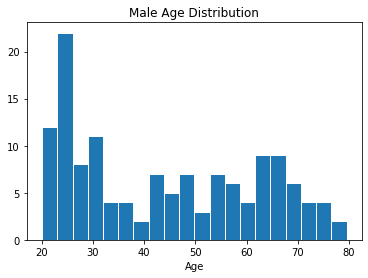

In [6]:
sns.distplot(train_labels_male, bins = 20, hist_kws={'alpha':1, 'edgecolor':'white'}, kde=False)
plt.title('Male Age Distribution');

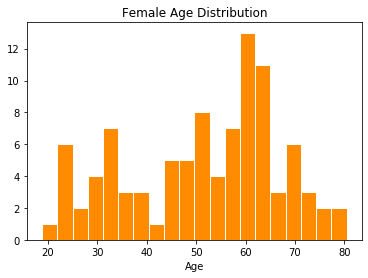

In [7]:
sns.distplot(train_labels_female, bins = 20, hist_kws={'alpha':1, 'color':'darkorange', 'edgecolor':'white'}, kde=False)
plt.title('Female Age Distribution');

# Distribution of Correlations between each predictor and response

In [9]:
cors_male = train_df_male.apply(lambda x: np.corrcoef(x, train_labels_male)[0, 1])
cors_female = train_df_female.apply(lambda x: np.corrcoef(x, train_labels_female)[0, 1])

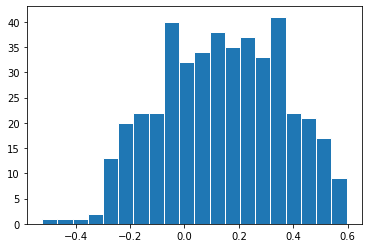

In [10]:
plt.hist(cors_male, bins = 20, edgecolor = 'white');

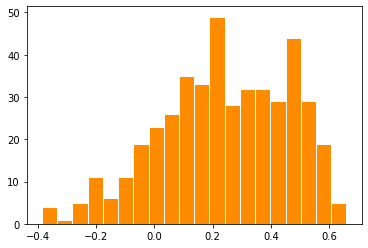

In [13]:
plt.hist(cors_female, bins = 20, edgecolor = 'white', color = 'darkorange');

# Modeling

# MALE

## PLS

In [8]:
# Standard Scaling
pls(train_df_male_stand, train_labels_male)

([({'n_components': 6, 'scale': False}, 0.7974170800233474),
  ({'n_components': 7, 'scale': False}, 0.7928723620682729),
  ({'n_components': 5, 'scale': False}, 0.791412814542557),
  ({'n_components': 8, 'scale': False}, 0.7906598735365596),
  ({'n_components': 4, 'scale': False}, 0.7852098379300413)],
 ('train R2: ', 0.9584240778743526, 'train RMSE:', 3.65846))

In [9]:
# Minmax Scaling
pls(train_df_male_minmax, train_labels_male)

([({'n_components': 6, 'scale': False}, 0.7876974860441388),
  ({'n_components': 5, 'scale': False}, 0.7874253206388424),
  ({'n_components': 7, 'scale': False}, 0.7854645002372976),
  ({'n_components': 8, 'scale': False}, 0.7822518182015965),
  ({'n_components': 9, 'scale': False}, 0.7710242128089473)],
 ('train R2: ', 0.9548048147852666, 'train RMSE:', 3.81438))

In [9]:
plscv = pls(train_df_male_stand, train_labels_male, cvres=True)

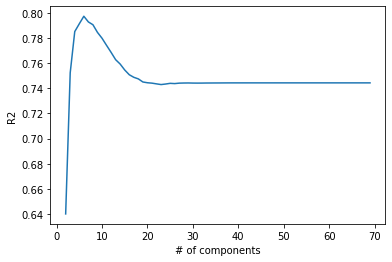

In [37]:
plt.plot(np.array(plscv['param_n_components']), plscv['mean_test_score'])
plt.xlabel('# of components')
plt.ylabel('R2');

# RIDGE

In [11]:
rdg = risso(train_df_male_stand, train_labels_male)

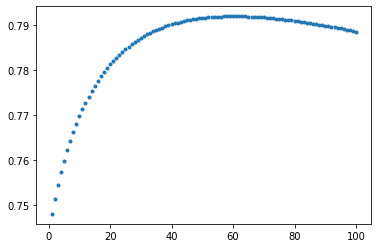

In [12]:
plt.plot(rdg[0], rdg[1], '.')

In [21]:
rdg[0][np.array(rdg[1]) == max(rdg[1])]

array([60.])

# Lasso

In [14]:
lss = risso(train_df_male_stand, train_labels_male, 'lasso', 
            alphas = np.linspace(0.01, 2, 50), tol = 0.0005)

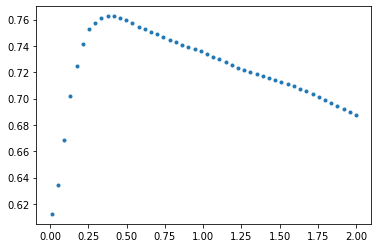

In [15]:
plt.plot(lss[0], lss[1], '.');

In [16]:
lss[0][np.array(lss[1]) == max(lss[1])]

array([0.3755102])

# SVM

In [18]:
# Standard Scaling
svm(train_df_male_stand, train_labels_male)

([({'C': 100000, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'},
   0.7816843947849688),
  ({'C': 50000, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'},
   0.7816843947849688),
  ({'C': 10000, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'},
   0.7816843947849688),
  ({'C': 1000, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'},
   0.7816843947849688),
  ({'C': 100, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'},
   0.7816843947849688)],
 ('train R2: ', 0.988869621368796, 'train RMSE:', 1.89292))

In [19]:
# Minmax Scaling
svm(train_df_male_minmax, train_labels_male)

([({'C': 1000, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'sigmoid'},
   0.7893238816330722),
  ({'C': 1000, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'sigmoid'},
   0.7826689181222127),
  ({'C': 1000, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'sigmoid'},
   0.7789805499405805),
  ({'C': 1000, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'sigmoid'},
   0.777709916790131),
  ({'C': 1000, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'},
   0.7772626987122067)],
 ('train R2: ', 0.9611390437610591, 'train RMSE:', 3.537))

In [20]:
svm(train_df_male_stand, train_labels_male, params = {'kernel':['linear'], 
                                                      'C':[0.001, 0.01, 0.1, 1, 10], 
                                                      'epsilon':np.linspace(1.5, 2.5, 20) 
                                                     })

([({'C': 0.1, 'epsilon': 2.0789473684210527, 'kernel': 'linear'},
   0.7878163509019221),
  ({'C': 0.1, 'epsilon': 2.1315789473684212, 'kernel': 'linear'},
   0.7877812171805353),
  ({'C': 0.1, 'epsilon': 2.026315789473684, 'kernel': 'linear'},
   0.7877734425853347),
  ({'C': 0.1, 'epsilon': 2.1842105263157894, 'kernel': 'linear'},
   0.787700709085478),
  ({'C': 0.1, 'epsilon': 1.9736842105263157, 'kernel': 'linear'},
   0.7876544276268079)],
 ('train R2: ', 0.979333389977605, 'train RMSE:', 2.57936))

# Random Forest

see `cluster_scripts/Age/rf_age.py`

Standard scaling worked better with this particular task, so I only used it

## Boosting 

see `cluster_scripts/Age/boost_age.py` and `cluster_scripts/Age/xgb_age.py`

# FEMALE

## PLS

In [21]:
pls(train_df_female_stand, train_labels_female, params = {'n_components':np.arange(1, 46)})

([({'n_components': 4}, 0.4991999744616612),
  ({'n_components': 3}, 0.4979089357550387),
  ({'n_components': 2}, 0.44910426799050185),
  ({'n_components': 5}, 0.4448815990357641),
  ({'n_components': 6}, 0.4057393418915732)],
 ('train R2: ', 0.8761718840194833, 'train RMSE:', 5.35355))

In [22]:
pls(train_df_female_minmax, train_labels_female, params = {'n_components':np.arange(1, 46)})

([({'n_components': 4}, 0.4991999744616612),
  ({'n_components': 3}, 0.4979089357550393),
  ({'n_components': 2}, 0.44910426799050196),
  ({'n_components': 5}, 0.4448815990357639),
  ({'n_components': 6}, 0.405739341891573)],
 ('train R2: ', 0.8761718840194833, 'train RMSE:', 5.35355))

## Ridge

In [24]:
rdgf = risso(train_df_female_stand, train_labels_female, alphas = np.linspace(50, 1000, 20))

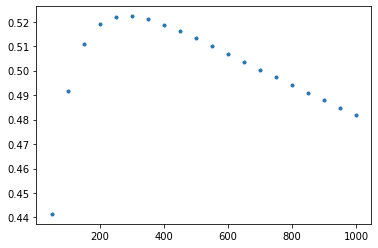

In [25]:
plt.plot(rdgf[0], rdgf[1], '.') 

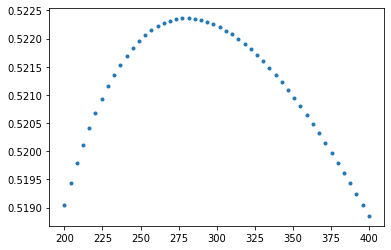

In [26]:
rdgf = risso(train_df_female_stand, train_labels_female, alphas = np.linspace(200, 400, 50))
plt.plot(rdgf[0], rdgf[1], '.') 

In [27]:
rdgf[0][np.argmax(rdgf[1])]

281.63265306122446

## Lasso

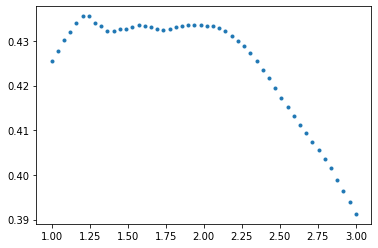

In [29]:
lsf = risso(train_df_female_stand, train_labels_female, alphas = np.linspace(1, 3, 50), model = 'lasso')
plt.plot(lsf[0], lsf[1], '.') 

In [30]:
lsf[0][np.argmax(lsf[1])]

1.2448979591836735

## SVM

In [31]:
svm(train_df_female_stand, train_labels_female)

([({'C': 100000, 'epsilon': 5, 'gamma': 'auto', 'kernel': 'linear'},
   0.537176072877646),
  ({'C': 50000, 'epsilon': 5, 'gamma': 'auto', 'kernel': 'linear'},
   0.537176072877646),
  ({'C': 10000, 'epsilon': 5, 'gamma': 'auto', 'kernel': 'linear'},
   0.537176072877646),
  ({'C': 1000, 'epsilon': 5, 'gamma': 'auto', 'kernel': 'linear'},
   0.537176072877646),
  ({'C': 100, 'epsilon': 5, 'gamma': 'auto', 'kernel': 'linear'},
   0.537176072877646)],
 ('train R2: ', 0.9160768808545682, 'train RMSE:', 4.4073))

In [32]:
svm(train_df_female_stand, train_labels_female, params = {
    'C':np.arange(1, 100, 10), 
    'epsilon':np.arange(1, 20, 1),
    'gamma':['auto'],
    'kernel':['linear']
})

([({'C': 91, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784),
  ({'C': 81, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784),
  ({'C': 71, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784),
  ({'C': 61, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784),
  ({'C': 51, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784)],
 ('train R2: ', 0.8870229309087376, 'train RMSE:', 5.1136))

In [33]:
svm(train_df_female_stand, train_labels_female, params = {
    'C':np.linspace(0.01, 10, 20), 
    'epsilon':np.arange(1, 20, 1),
    'gamma':['auto'],
    'kernel':['linear']
})

([({'C': 10.0, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784),
  ({'C': 9.47421052631579, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784),
  ({'C': 8.948421052631579, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784),
  ({'C': 8.42263157894737, 'epsilon': 6, 'gamma': 'auto', 'kernel': 'linear'},
   0.5519018125552784),
  ({'C': 7.8968421052631586,
    'epsilon': 6,
    'gamma': 'auto',
    'kernel': 'linear'},
   0.5519018125552784)],
 ('train R2: ', 0.8870229309087376, 'train RMSE:', 5.1136))

Text(0, 0.5, 'CV error')

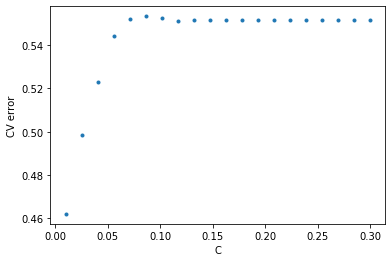

In [37]:
svmf = svm(train_df_female_stand, train_labels_female, params = {
    'C':np.linspace(0.01, 0.3, 20), 
    'epsilon':[6],
    'gamma':['auto'],
    'kernel':['linear']
}, cvres=True)
plt.plot(np.array(svmf['param_C']), svmf['mean_test_score'], '.')
plt.xlabel('C')
plt.ylabel('CV error')

In [38]:
svmf = svm(train_df_female_stand, train_labels_female, params = {
    'C':[0.1], 
    'epsilon':np.linspace(1, 20, 20),
    'gamma':['auto'],
    'kernel':['linear']
}, cvres=True)
svmf2 = svm(train_df_female_stand, train_labels_female, params = {
    'C':[1], 
    'epsilon':np.linspace(1, 20, 20),
    'gamma':['auto'],
    'kernel':['linear']
}, cvres=True)

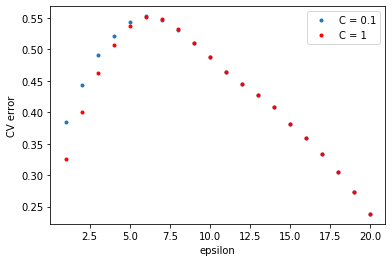

In [43]:
plt.plot(np.array(svmf['param_epsilon']), svmf['mean_test_score'], '.', label = 'C = 0.1')
plt.plot(np.array(svmf2['param_epsilon']), svmf2['mean_test_score'], '.r', label = 'C = 1')
plt.xlabel('epsilon')
plt.ylabel('CV error')
plt.legend();

## RandomForest

see `cluster_scripts/Age/rf_age.py`

## Boosting

see `cluster_scripts/Age/boost_age.py`